In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

 

/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv


# **Importing The Necessary Libraries**

In [12]:
import pandas as pd
import numpy as np
import os,sys
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Read CSV data into a DataFrame**

In [13]:
df = pd.read_csv("/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv", sep=';')

# **Checking the Shape of the data**

In [14]:
df.shape

(70000, 13)

In [29]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# **Checking for any duplicate values**

In [16]:
df.duplicated().sum()

0

# **Checking for any Null Values**

In [17]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [18]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [19]:
df.skew()

id             -0.001278
age            -0.307055
gender          0.630960
height         -0.642187
weight          1.012070
ap_hi          85.296214
ap_lo          32.114083
cholesterol     1.587123
gluc            2.397462
smoke           2.905867
alco            3.956607
active         -1.529473
cardio          0.001200
dtype: float64

In [20]:
df=df[df.ap_hi<=250]
df=df[df.ap_lo<=150]
df=df[df.weight<=125]
df=df[df.height<=200]

# **Plotting the Columns**

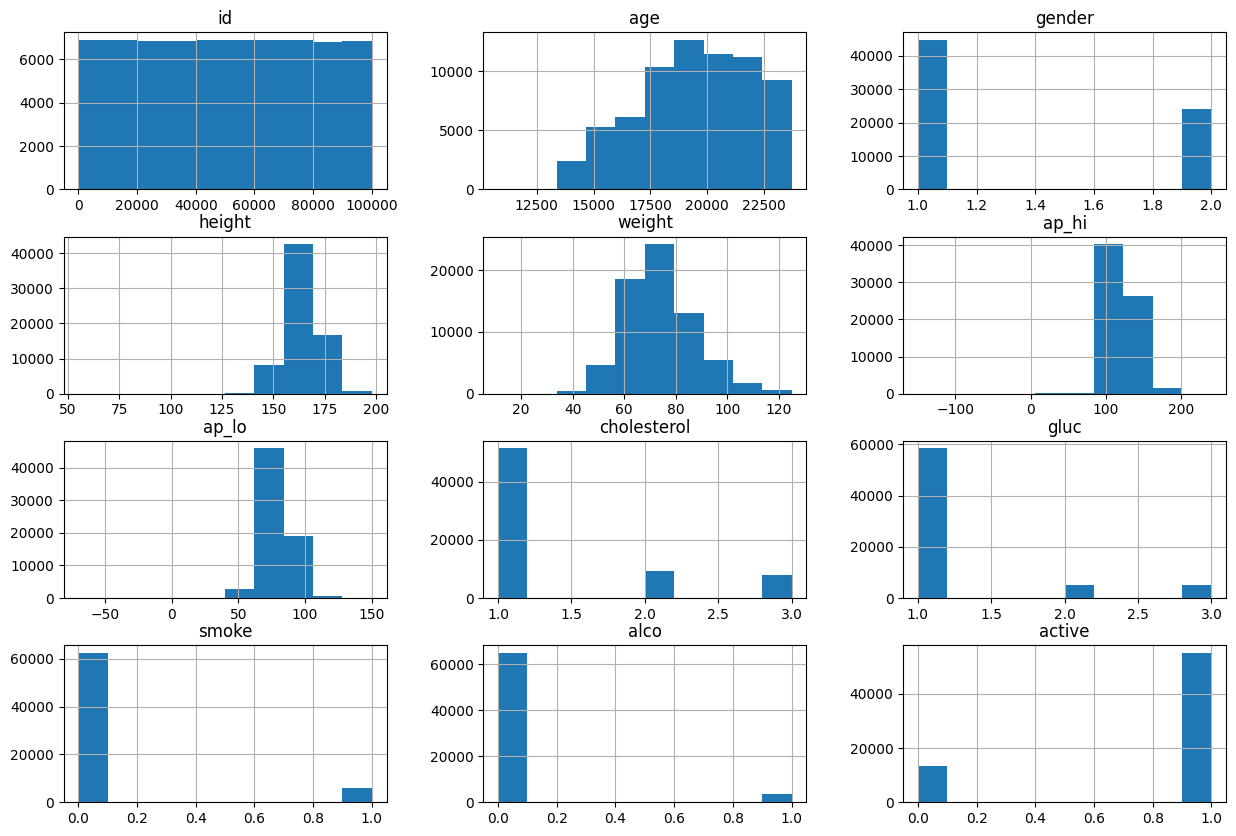

In [21]:
x=df.loc[:,df.columns!='cardio'].values[:,1:]
x1=df.loc[:,df.columns!='cardio']
y=df.loc[:,'cardio'].values
y1=df.loc[:,'cardio']
x1.hist(figsize=(15,10))
plt.show()

# **Scale the features to between -1 and 1**

In [22]:
scaler=MinMaxScaler((-1,1))
x1=scaler.fit_transform(x)
y1=y

# **Split the dataset into Train and Test Datasets**

In [23]:

xtrain,xtest,ytrain,ytest=train_test_split(x1, y1, test_size=0.24,random_state=42)

# **Train the model using XGBoost Classifier**

In [24]:
# Train the model
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(xtrain,ytrain)
predict=model.predict(xtest)

# **Confusion Matrix**

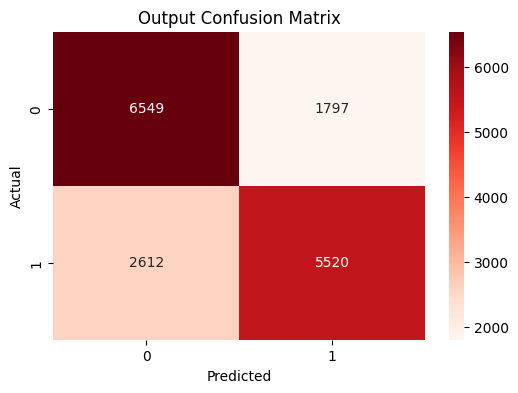

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(ytest, predict)

# Plot the confusion matrix heatmap
plt.figure(figsize=(6, 4))
fg = sns.heatmap(cm, annot=True, cmap="Reds", fmt='d') 
figure = fg.get_figure()

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")
plt.show()

# **Printing the Confusion Matrix**

In [26]:
print('True Positive Cases : {}'.format(cm[1][1]))
print('True Negative Cases : {}'.format(cm[0][0]))
print('False Positive Cases : {}'.format(cm[0][1]))
print('False Negative Cases : {}'.format(cm[1][0]))

True Positive Cases : 5520
True Negative Cases : 6549
False Positive Cases : 1797
False Negative Cases : 2612


# **Calculating the Precison, Recall and F1-Score**

In [27]:
pre = round(8486 / (8486 + 2767),3)
print("The Precision is:", pre)
rec = round(8486 / (8486 + 3794),3)
print("The Recall is:", rec)
f1_score = round(2 * (pre * rec) / (pre + rec),3)
print("The F1 Score is:", f1_score)

The Precision is: 0.754
The Recall is: 0.691
The F1 Score is: 0.721


# **Model Prediction Accuracy**

In [28]:
print("The Model Accuracy is:",round(accuracy_score(ytest,predict)*100,3),"%")

The Model Accuracy is: 73.243 %
